In [18]:
# Analizleri yorumlayarak çeşitli tarih aralarındaki, 
# finans haberleri veya sosyal medya içerikleri 
# duygu analizi için kullanılabilir.

# 2022-03-09 ve 2024-03-09 arası alınmıştır.
# TESLA(TSLA), NVIDIA(NVDA), APPLE(AAPL), AMAZON(AMZN)

# Fiyat değişimi, RSI ve MACD göstergelerini analiz edilmiştir.
# Bu göstergelerin ne oldukları aşağıdaki yorumlarda bulunmaktadır.

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
tesla = yf.download("TSLA", start="2022-03-09", end="2024-03-09")
print(tesla)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-09  279.826660  286.853333  277.336670  286.323334  286.323334   
2022-03-10  283.816681  284.816681  270.119995  279.433319  279.433319   
2022-03-11  280.066681  281.266663  264.589996  265.116669  265.116669   
2022-03-14  260.203339  266.899994  252.013336  255.456665  255.456665   
2022-03-15  258.423340  268.523346  252.190002  267.296661  267.296661   
...                ...         ...         ...         ...         ...   
2024-03-04  198.729996  199.750000  186.720001  188.139999  188.139999   
2024-03-05  183.050003  184.589996  177.570007  180.740005  180.740005   
2024-03-06  179.990005  181.580002  173.699997  176.539993  176.539993   
2024-03-07  174.350006  180.039993  173.699997  178.649994  178.649994   
2024-03-08  181.500000  182.729996  174.699997  175.339996  175.339996   

               Volume  
Date         

[*********************100%%**********************]  1 of 1 completed


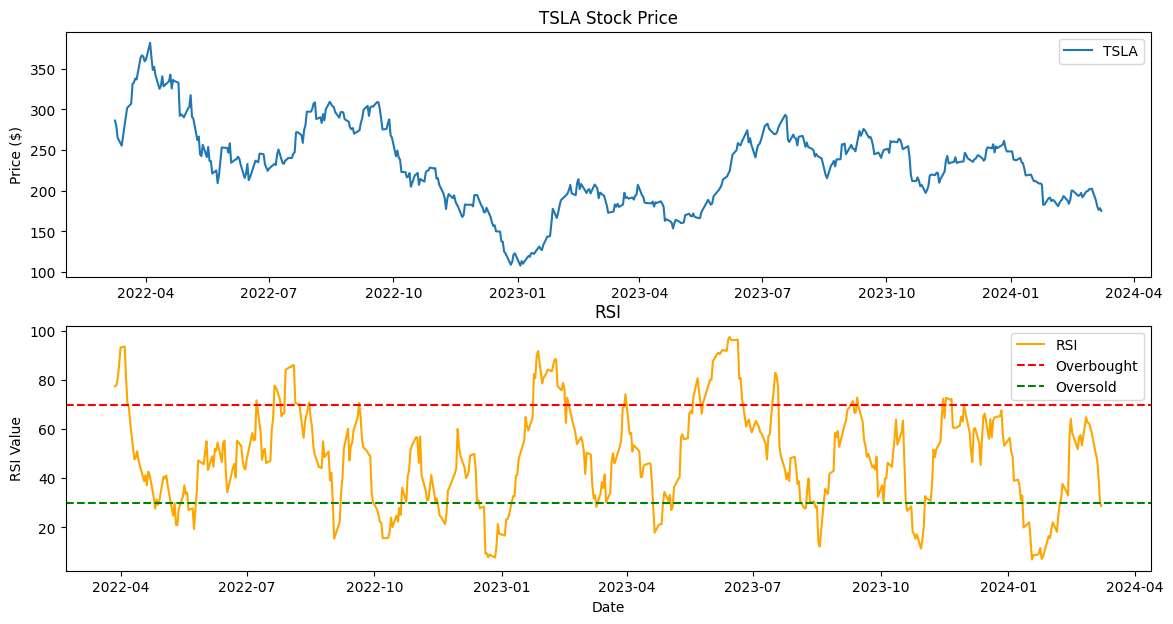

In [21]:
# Relatif Güç Endeksi (RSI), ilgili periyoddaki kapanış değerlerini 
# periyodun bir önceki kapanış değerleriyle karşılaştırarak hesaplanan kısa 
# ve orta vadeli trendin yönü hakkında öngörüde bulunmayı sağlayan bir indikatördür.

# 70 seviyesinin üzerinde aşırı alım, 30 seviyesinin altında ise aşırı satım bölgelerini gösterir.
tesla = yf.download("TSLA", start="2022-03-09", end="2024-03-09")
delta = tesla['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
overbought = 70
oversold = 30

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(tesla['Close'], label='TSLA')
plt.title('TSLA Stock Price')
plt.ylabel('Price ($)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rsi, label='RSI', color='orange')
plt.axhline(y=overbought, color='r', linestyle='--', label = 'Overbought') # Aşırı alım
plt.axhline(y=oversold, color='g', linestyle='--', label = 'Oversold' ) # Aşırı satım 
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

plt.show()

[*********************100%%**********************]  1 of 1 completed


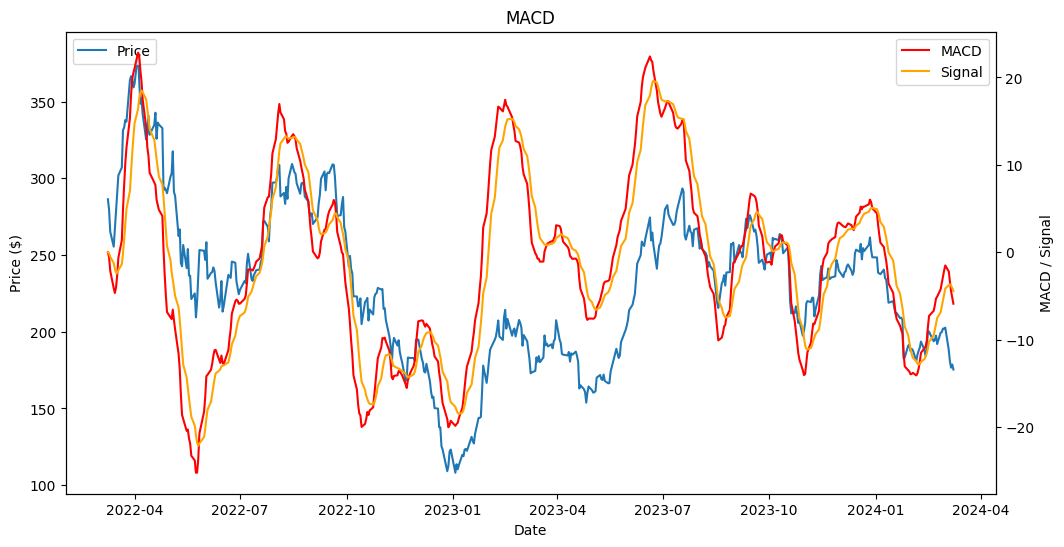

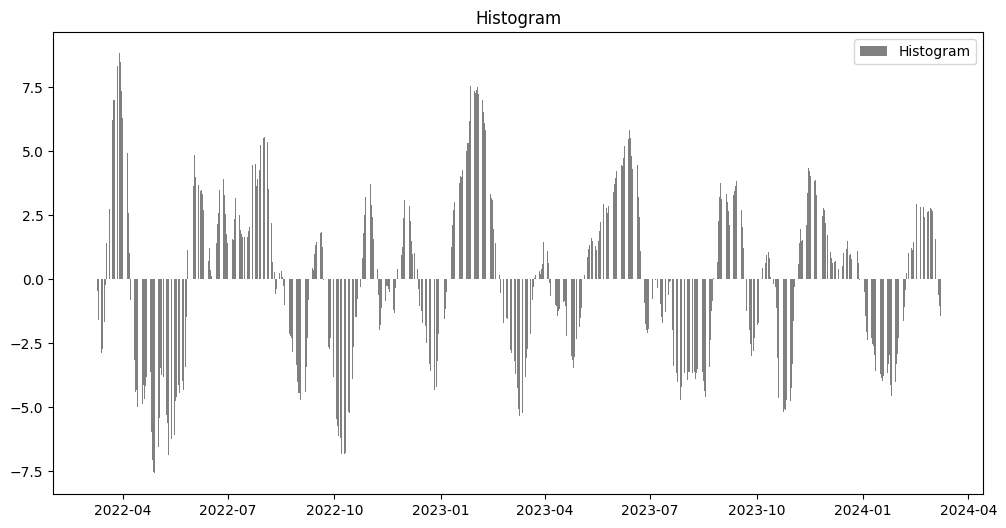

In [22]:
# MACD, trendin gücünü ve yönünü belirlemek için kullanılan bir göstergedir. 
# MACD hattı, sinyal hattını yukarı yönlü keserse, 
# bu bir alım sinyali olarak yorumlanabilir.

tesla = yf.download("TSLA", start="2022-03-09", end="2024-03-09")


def calculateMacd(data, shortWindow=12, longWindow=26, signalWindow=9):
    exp1 = data['Close'].ewm(span=shortWindow, adjust=False).mean()
    exp2 = data['Close'].ewm(span=longWindow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signalWindow, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram
# Pozitif değerler, MACD hattının sinyal hattını yukarı yönlü kestiği durumları, 
# Negatif değerler ise aşağı yönlü kestiği durumları temsil eder.

macd, signal, histogram = calculateMacd(tesla)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(tesla.index, tesla['Close'], label='Price')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(tesla.index, macd, label='MACD', color='red')
ax2.plot(tesla.index, signal, label='Signal', color='orange')
ax2.legend(loc='upper right')
ax1.set_title('MACD')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax2.set_ylabel('MACD / Signal')
plt.figure(figsize=(12, 6))
plt.bar(tesla.index, histogram, label='Histogram', color='gray')
plt.legend(loc='upper right')
plt.title('Histogram')
plt.show()


In [23]:
nvidia = yf.download("NVDA", start="2022-03-09", end="2024-03-09")
print(nvidia)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-09  223.869995  232.199997  222.470001  230.139999  229.851395   
2022-03-10  225.309998  227.880005  218.820007  226.580002  226.295853   
2022-03-11  230.220001  231.449997  220.460007  221.000000  220.722855   
2022-03-14  218.690002  222.619995  211.589996  213.300003  213.032516   
2022-03-15  215.179993  230.380005  213.220001  229.729996  229.441910   
...                ...         ...         ...         ...         ...   
2024-03-04  841.299988  876.950012  837.190002  852.369995  852.330017   
2024-03-05  852.700012  860.969971  834.169983  859.640015  859.640015   
2024-03-06  880.219971  897.239990  870.299988  887.000000  887.000000   
2024-03-07  901.580017  927.669983  896.020020  926.690002  926.690002   
2024-03-08  951.380005  974.000000  865.059998  875.280029  875.280029   

               Volume  
Date         

[*********************100%%**********************]  1 of 1 completed


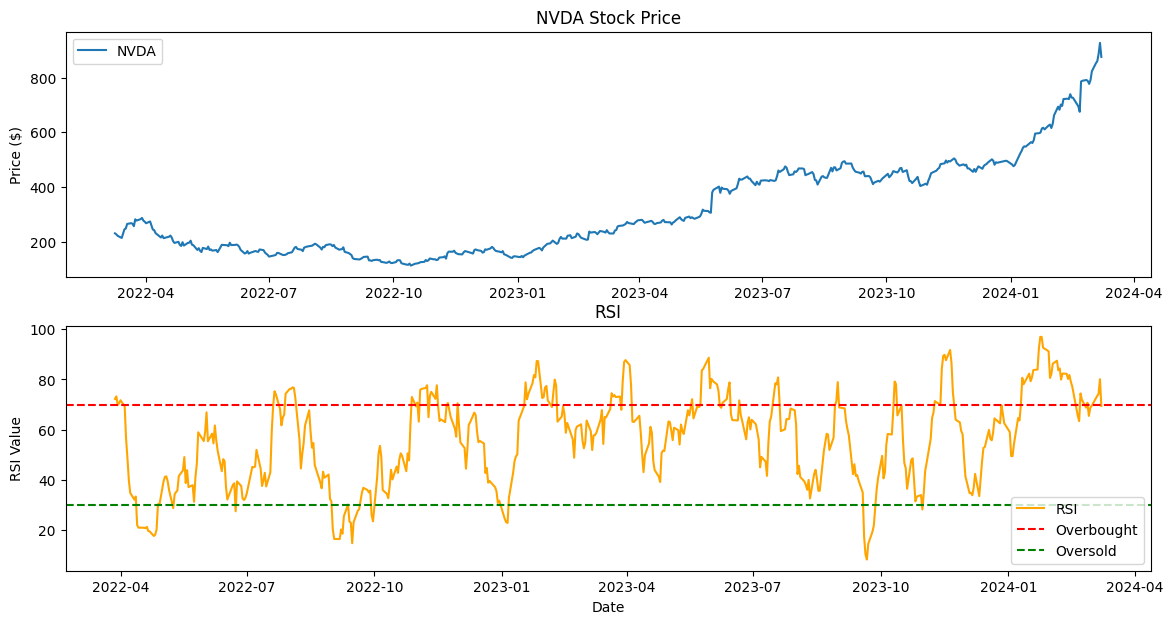

In [24]:
nvidia = yf.download("NVDA", start="2022-03-09", end="2024-03-09")
delta = nvidia['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
overbought = 70
oversold = 30

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(nvidia['Close'], label='NVDA')
plt.title('NVDA Stock Price')
plt.ylabel('Price ($)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rsi, label='RSI', color='orange')
plt.axhline(y=overbought, color='r', linestyle='--', label = 'Overbought') # Aşırı alım
plt.axhline(y=oversold, color='g', linestyle='--', label = 'Oversold' ) # Aşırı satım 
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

plt.show()

[*********************100%%**********************]  1 of 1 completed


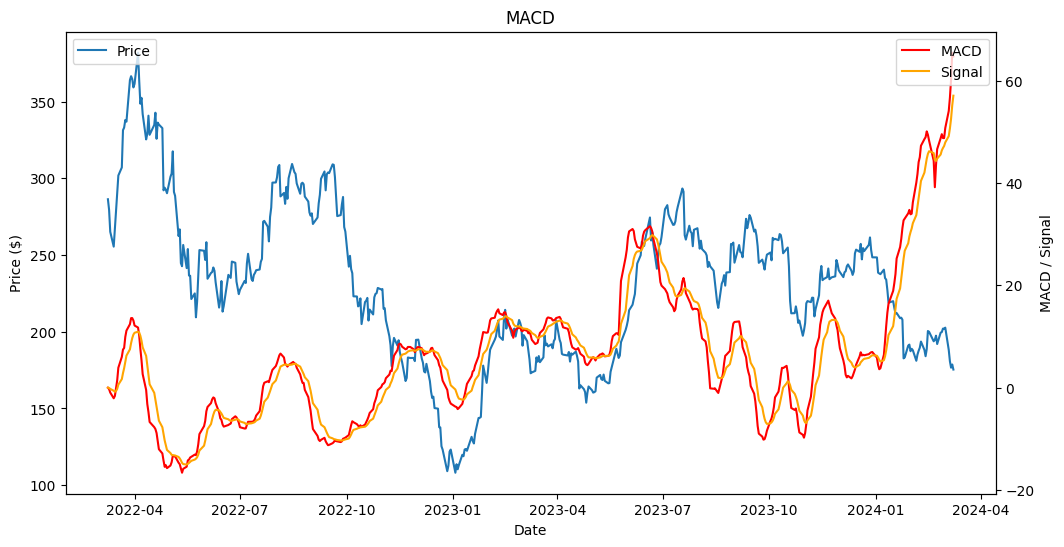

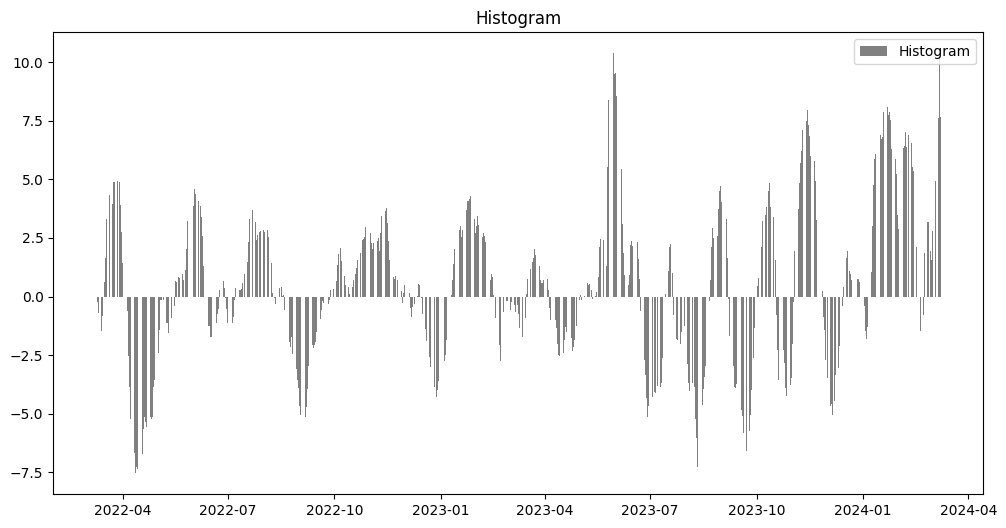

In [25]:
nvidia = yf.download("NVDA", start="2022-03-09", end="2024-03-09")


def calculateMacd(data, shortWindow=12, longWindow=26, signalWindow=9):
    exp1 = data['Close'].ewm(span=shortWindow, adjust=False).mean()
    exp2 = data['Close'].ewm(span=longWindow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signalWindow, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

macd, signal, histogram = calculateMacd(nvidia)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(tesla.index, tesla['Close'], label='Price')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(nvidia.index, macd, label='MACD', color='red')
ax2.plot(nvidia.index, signal, label='Signal', color='orange')
ax2.legend(loc='upper right')
ax1.set_title('MACD')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax2.set_ylabel('MACD / Signal')
plt.figure(figsize=(12, 6))
plt.bar(nvidia.index, histogram, label='Histogram', color='gray')
plt.legend(loc='upper right')
plt.title('Histogram')
plt.show()

In [26]:
apple = yf.download("AAPL", start="2022-03-09", end="2024-03-09")
print(apple)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-09  161.479996  163.410004  159.410004  162.949997  161.108887   
2022-03-10  160.199997  160.389999  155.979996  158.520004  156.728928   
2022-03-11  158.929993  159.279999  154.500000  154.729996  152.981735   
2022-03-14  151.449997  154.119995  150.100006  150.619995  148.918182   
2022-03-15  150.899994  155.570007  150.380005  155.089996  153.337692   
...                ...         ...         ...         ...         ...   
2024-03-04  176.149994  176.899994  173.789993  175.100006  175.100006   
2024-03-05  170.759995  172.039993  169.619995  170.119995  170.119995   
2024-03-06  171.059998  171.240005  168.679993  169.119995  169.119995   
2024-03-07  169.149994  170.729996  168.490005  169.000000  169.000000   
2024-03-08  169.000000  173.699997  168.940002  170.729996  170.729996   

               Volume  
Date         

[*********************100%%**********************]  1 of 1 completed


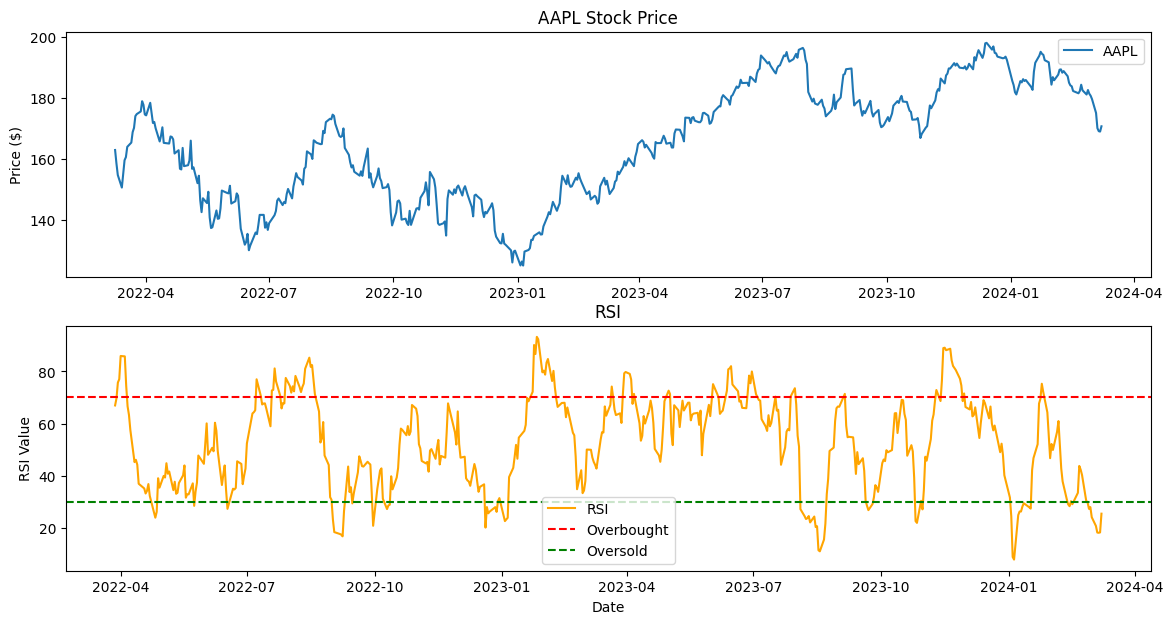

In [27]:
apple = yf.download("AAPL", start="2022-03-09", end="2024-03-09")
delta = apple['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
overbought = 70
oversold = 30

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(apple['Close'], label='AAPL')
plt.title('AAPL Stock Price')
plt.ylabel('Price ($)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rsi, label='RSI', color='orange')
plt.axhline(y=overbought, color='r', linestyle='--', label = 'Overbought') # Aşırı alım
plt.axhline(y=oversold, color='g', linestyle='--', label = 'Oversold' ) # Aşırı satım 
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

plt.show()

[*********************100%%**********************]  1 of 1 completed


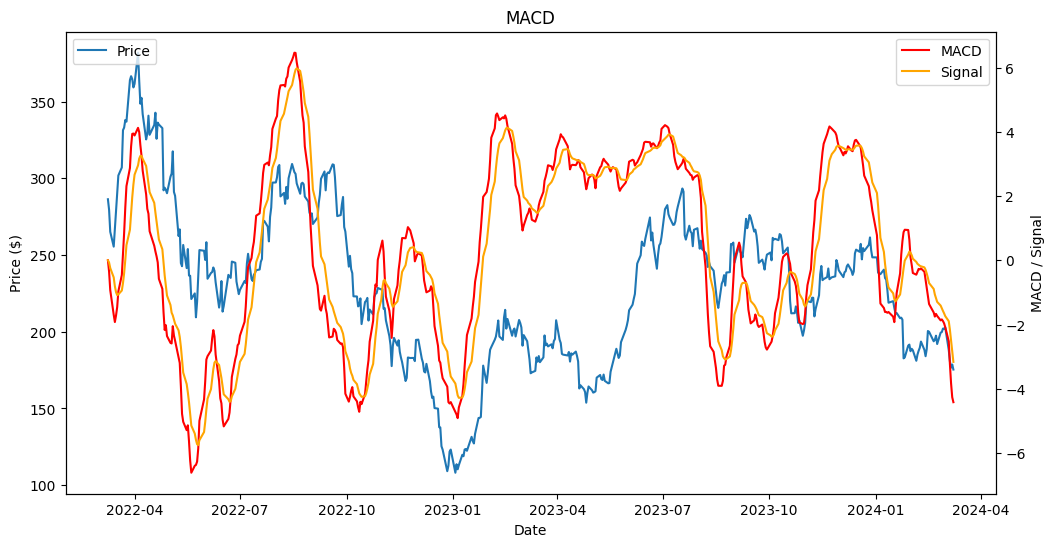

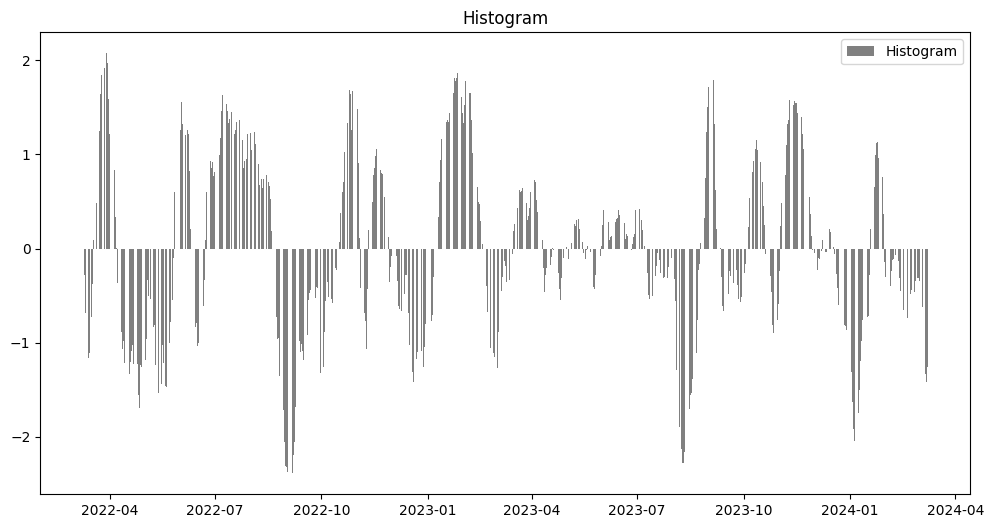

In [28]:
apple = yf.download("AAPL", start="2022-03-09", end="2024-03-09")


def calculateMacd(data, shortWindow=12, longWindow=26, signalWindow=9):
    exp1 = data['Close'].ewm(span=shortWindow, adjust=False).mean()
    exp2 = data['Close'].ewm(span=longWindow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signalWindow, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

macd, signal, histogram = calculateMacd(apple)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(tesla.index, tesla['Close'], label='Price')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(apple.index, macd, label='MACD', color='red')
ax2.plot(apple.index, signal, label='Signal', color='orange')
ax2.legend(loc='upper right')
ax1.set_title('MACD')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax2.set_ylabel('MACD / Signal')
plt.figure(figsize=(12, 6))
plt.bar(apple.index, histogram, label='Histogram', color='gray')
plt.legend(loc='upper right')
plt.title('Histogram')
plt.show()

In [29]:
amazon = yf.download("AMZN", start="2022-03-09", end="2024-03-09")
print(amazon)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-09  139.500000  140.250000  136.828003  139.279007  139.279007   
2022-03-10  145.684998  148.674500  143.977997  146.817505  146.817505   
2022-03-11  149.574493  149.675003  145.369003  145.524506  145.524506   
2022-03-14  145.981003  147.449997  140.884003  141.852997  141.852997   
2022-03-15  142.850006  147.985001  142.000000  147.366501  147.366501   
...                ...         ...         ...         ...         ...   
2024-03-04  177.529999  180.139999  177.490005  177.580002  177.580002   
2024-03-05  176.929993  176.929993  173.300003  174.119995  174.119995   
2024-03-06  175.539993  176.460007  173.259995  173.509995  173.509995   
2024-03-07  174.830002  177.990005  173.720001  176.820007  176.820007   
2024-03-08  176.440002  178.789993  174.330002  175.350006  175.350006   

               Volume  
Date         

[*********************100%%**********************]  1 of 1 completed


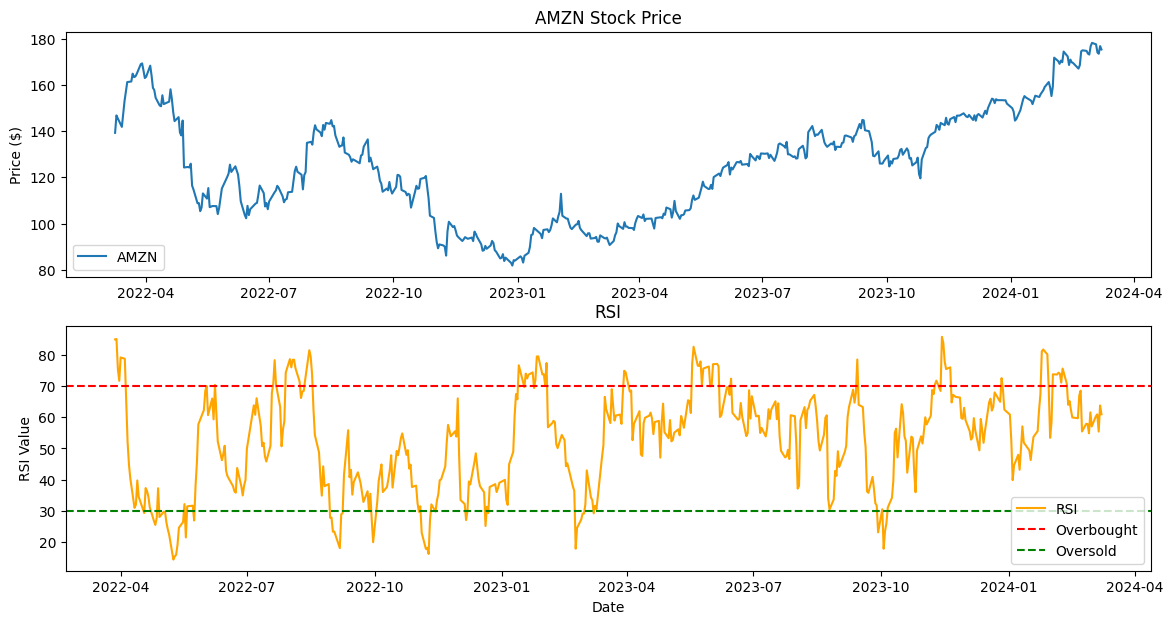

In [30]:
amazon = yf.download("AMZN", start="2022-03-09", end="2024-03-09")
delta = amazon['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
overbought = 70
oversold = 30

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(amazon['Close'], label='AMZN')
plt.title('AMZN Stock Price')
plt.ylabel('Price ($)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rsi, label='RSI', color='orange')
plt.axhline(y=overbought, color='r', linestyle='--', label = 'Overbought') # Aşırı alım
plt.axhline(y=oversold, color='g', linestyle='--', label = 'Oversold' ) # Aşırı satım 
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

plt.show()

[*********************100%%**********************]  1 of 1 completed


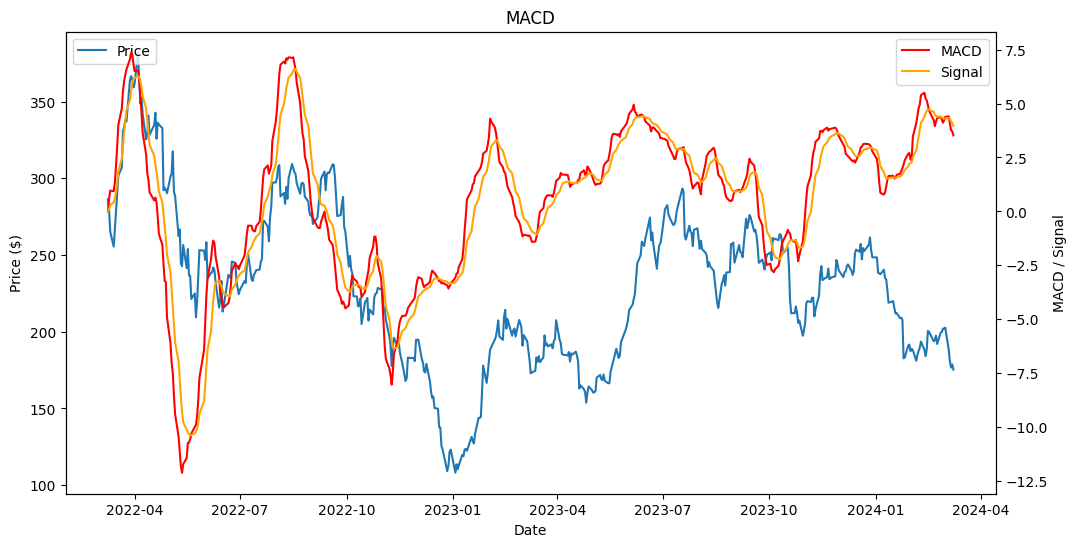

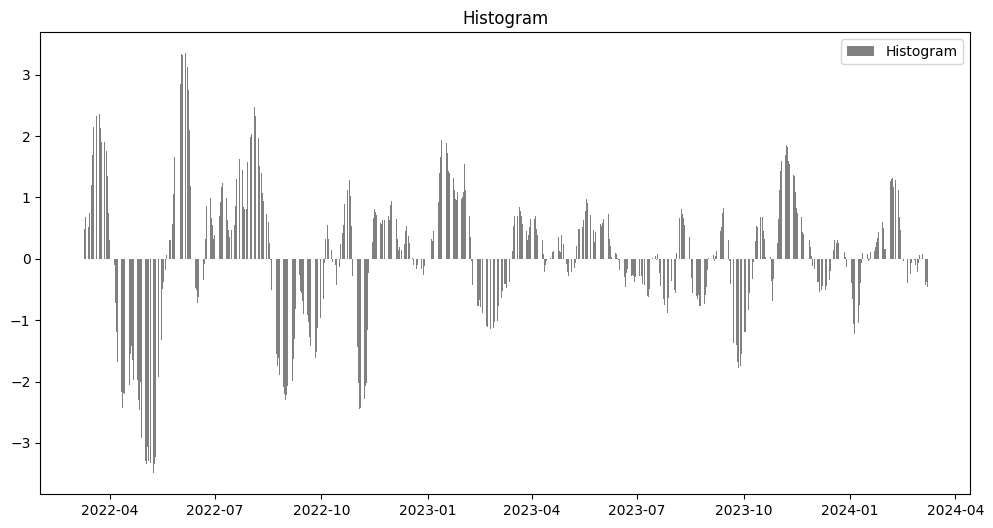

In [31]:
amazon = yf.download("AMZN", start="2022-03-09", end="2024-03-09")


def calculateMacd(data, shortWindow=12, longWindow=26, signalWindow=9):
    exp1 = data['Close'].ewm(span=shortWindow, adjust=False).mean()
    exp2 = data['Close'].ewm(span=longWindow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signalWindow, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

macd, signal, histogram = calculateMacd(amazon)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(tesla.index, tesla['Close'], label='Price')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(amazon.index, macd, label='MACD', color='red')
ax2.plot(amazon.index, signal, label='Signal', color='orange')
ax2.legend(loc='upper right')
ax1.set_title('MACD')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax2.set_ylabel('MACD / Signal')
plt.figure(figsize=(12, 6))
plt.bar(amazon.index, histogram, label='Histogram', color='gray')
plt.legend(loc='upper right')
plt.title('Histogram')
plt.show()